### **Pembelajaran Mesin H**
### **Mohammad Hanif Furqan Aufa Putra / 502522161**
### **Tugas K-Means Clustering**

In [43]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

/kaggle/input/vehicle-sales-data/car_prices.csv


Tugas Individu: Mengerjakan Hands Lab dari K-Means Clustering pada Machine Learning with Python | Cognitive Class.

    1. Kelompokkan data sintetik hasil generate secara random, jika jumlah cluster adalah 2 dan 3.
    2. Selesaikan permasalahan dataset penjualan mobil menggunakan K-Means Clustering, lalu analisis hasil clustering. Silakan Anda juga bisa melakukan EDA (Exploratory Data Analysis) maupun data preprocessing sesuai kebutuhan.

 Link Dataset: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data

2. Selesaikan permasalahan dataset penjualan mobil menggunakan K-Means Clustering, lalu analisis hasil clustering. Silakan Anda juga bisa melakukan EDA (Exploratory Data Analysis) maupun data preprocessing sesuai kebutuhan.


#### **Read Data**

In [44]:
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### **Assessing Data**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Menggunakan operasi statistika pada nilai numerik dan non-numerik

In [46]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


Hitung jumlah data yang null pada setiap kolom

In [47]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Hitung data yang merupakan duplikat dari row sebelumnya

In [48]:
df.duplicated().sum()

0

***Data Numerik:***

    Tahun: Tahun pembuatan kendaraan
    Kondisi: Nilai numerik yang menunjukkan kondisi kendaraan
    Odometer: Jarak tempuh kendaraan
    MMR: Nilai dari Laporan Pasar Manheim, alat penetapan harga di industri otomotif
    Harga Jual: Harga jual kendaraan

***Data Kategorikal:***

    Merek: Produsen kendaraan
    Model: Tipe kendaraan
    Trim: Versi atau paket opsi khusus dari model
    Jenis Bodi: Bentuk bodi kendaraan
    Transmisi: Jenis transmisi kendaraan
    VIN: Nomor Identifikasi Kendaraan, kode unik untuk setiap kendaraan
    Negara Bagian: Lokasi kendaraan
    Warna Eksterior: Warna bodi kendaraan
    Warna Interior: Warna interior kendaraan
    Penjual: Entitas atau perusahaan yang menjual kendaraan
    Tanggal Penjualan: Tanggal dan waktu penjualan kendaraan

***Masalah pada Data:***

    Banyak kolom numerik dan kategorikal yang memiliki nilai kosong.
    Beberapa kolom atau atribut tidak penting atau tidak digunakan dalam EDA dan K-Means Clustering.


### **Data Cleaning**

**Menghapus kolom yang tidak relevan**

Setelah analisis, kolom Model, Trim, Transmission, VIN, Interior, dan Sale Date dianggap tidak penting dalam proses EDA dan perhitungan k-means.

In [49]:
df = df.drop(['model', 'trim', 'transmission', 'vin', 'interior', 'saledate'], axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   body          545642 non-null  object 
 3   state         558837 non-null  object 
 4   condition     547017 non-null  float64
 5   odometer      558743 non-null  float64
 6   color         558088 non-null  object 
 7   seller        558837 non-null  object 
 8   mmr           558799 non-null  float64
 9   sellingprice  558825 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 42.6+ MB


**Penanganan nilai null pada kolom numerik**

Pertama, kami mengevaluasi visualisasi data untuk menentukan apakah menggunakan mean atau median adalah langkah yang tepat.df.info()

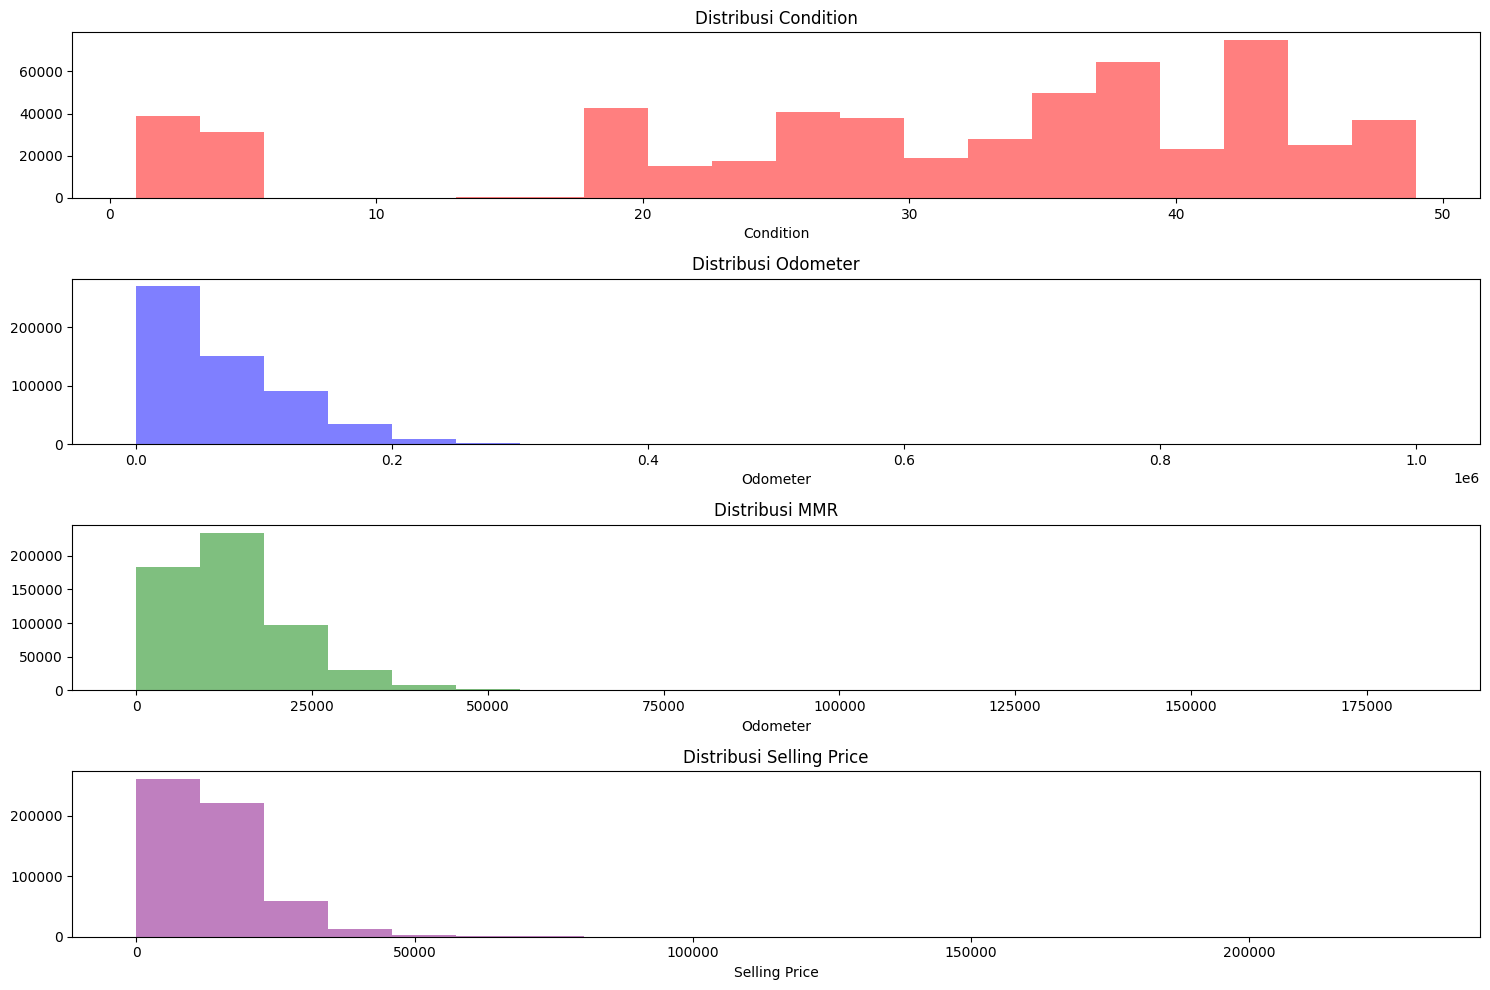

In [50]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(df['condition'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Condition')
plt.xlabel('Condition')

plt.subplot(4, 1, 2)
plt.hist(df['odometer'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi Odometer')
plt.xlabel('Odometer')

plt.subplot(4, 1, 3)
plt.hist(df['mmr'].dropna(), bins=20, color='green', alpha=0.5)
plt.title('Distribusi MMR')
plt.xlabel('Odometer')

plt.subplot(4, 1, 4)
plt.hist(df['sellingprice'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Selling Price')
plt.xlabel('Selling Price')

plt.tight_layout()
plt.show()

Karena kondisi data tersebar secara luas, nilai null diisi dengan median. Sedangkan untuk odometer, mmr, dan harga penjualan, nilai null diisi dengan rata-rata.

In [52]:
df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['mmr'].fillna(df['mmr'].mean(), inplace=True)
df['sellingprice'].fillna(df['sellingprice'].mean(), inplace=True)

**Penanganan nilai null pada kolom kategorikal**

Salah satu cara untuk mengatasi hal ini adalah dengan menggantinya dengan kategori penampung, seperti 'Other'.

In [53]:
df['make'].fillna('Other', inplace=True)
df['body'].fillna('Other', inplace=True)
df['color'].fillna('Other', inplace=True)

In [54]:
df.isnull().sum()

year            0
make            0
body            0
state           0
condition       0
odometer        0
color           0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [55]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,558837.000000,558837.000000,558837.000000,558837.000000
mean,2010.038927,30.763899,68320.017767,13769.377495,13611.358810
std,3.966864,13.274944,53394.051633,9679.638057,9749.396951
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28375.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52266.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99103.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


**Scatter Matrix**

Untuk mengetahui korelasi antar semua kombinasi data numerik

In [57]:
numeric_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

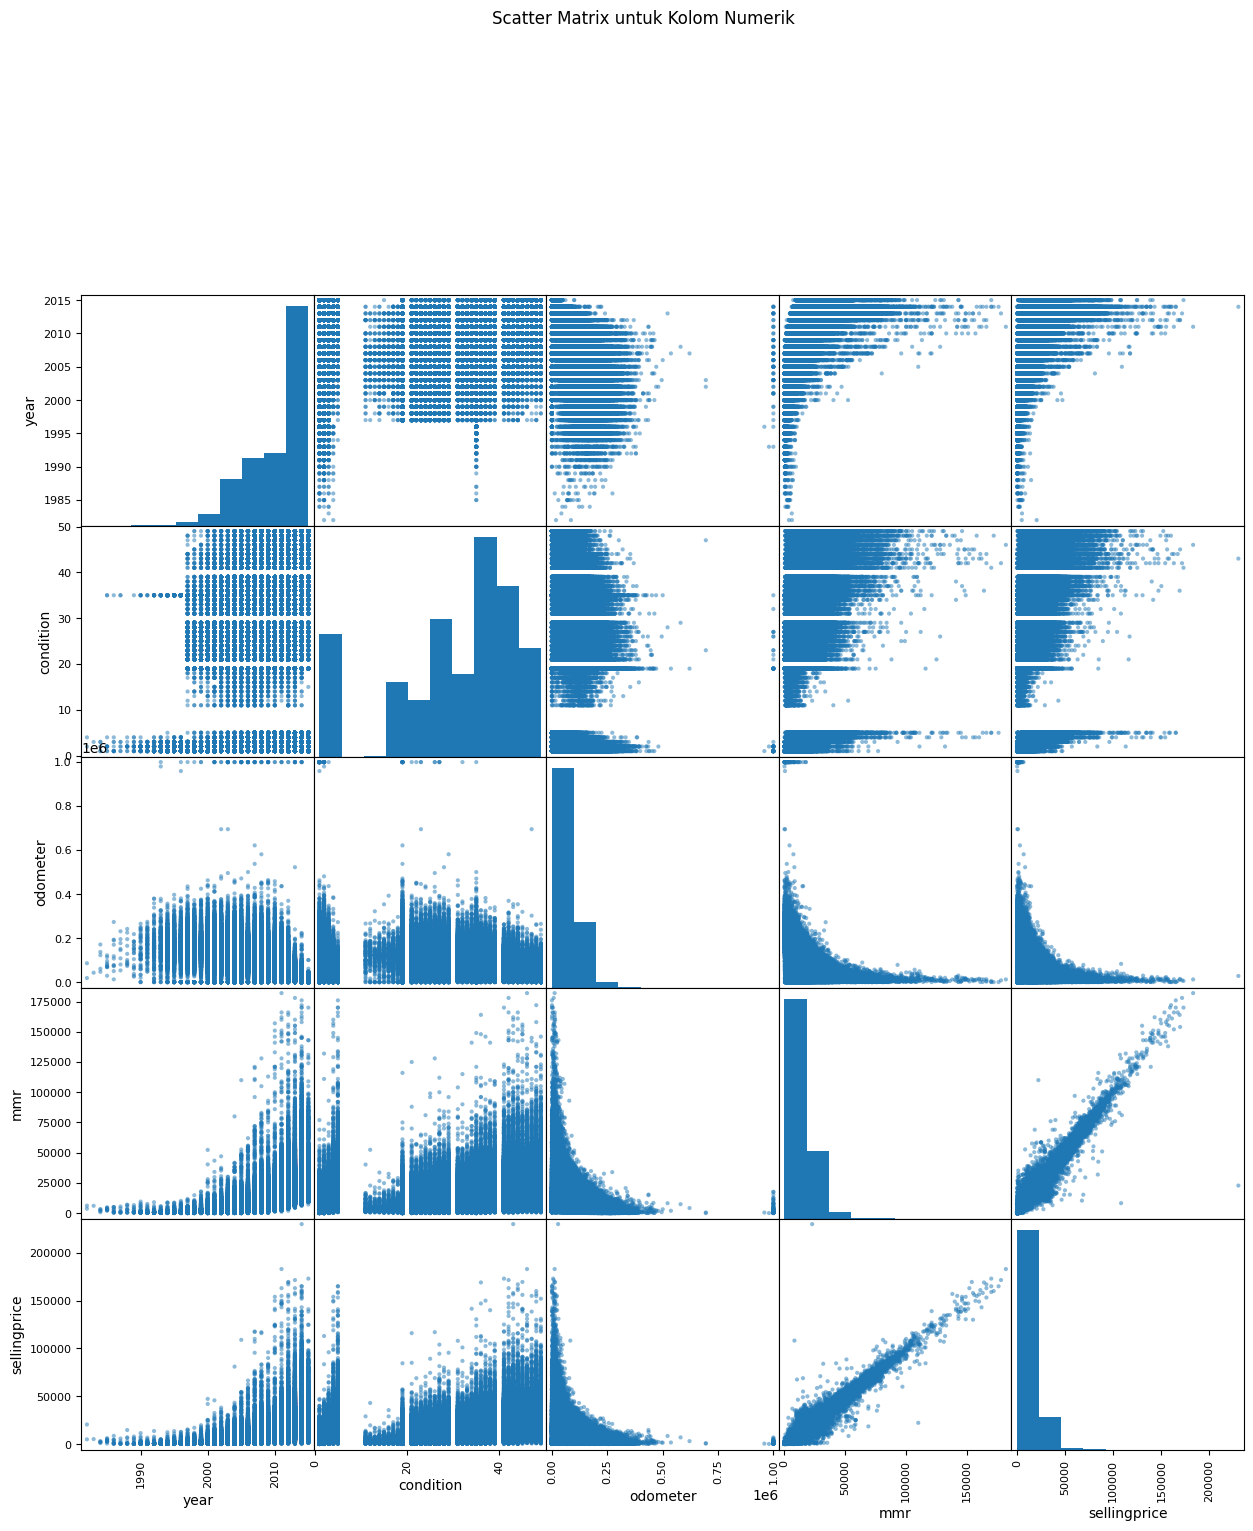

In [58]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[numeric_columns], alpha=0.5, figsize=(15, 15), diagonal='hist')
plt.suptitle('Scatter Matrix untuk Kolom Numerik', y=1.07)
plt.show()

In [59]:
df.shape

(558837, 10)

Dapat diperhatikan dalam scatter matrix bahwa terdapat banyak data outlier, sehingga akan dilakukan penanganan outlier menggunakan z-score.

In [60]:
from scipy import stats

z_scores = stats.zscore(df[numeric_columns])
clean_df = df[(z_scores < 2.5).all(axis=1)]
clean_df.shape

(534360, 10)

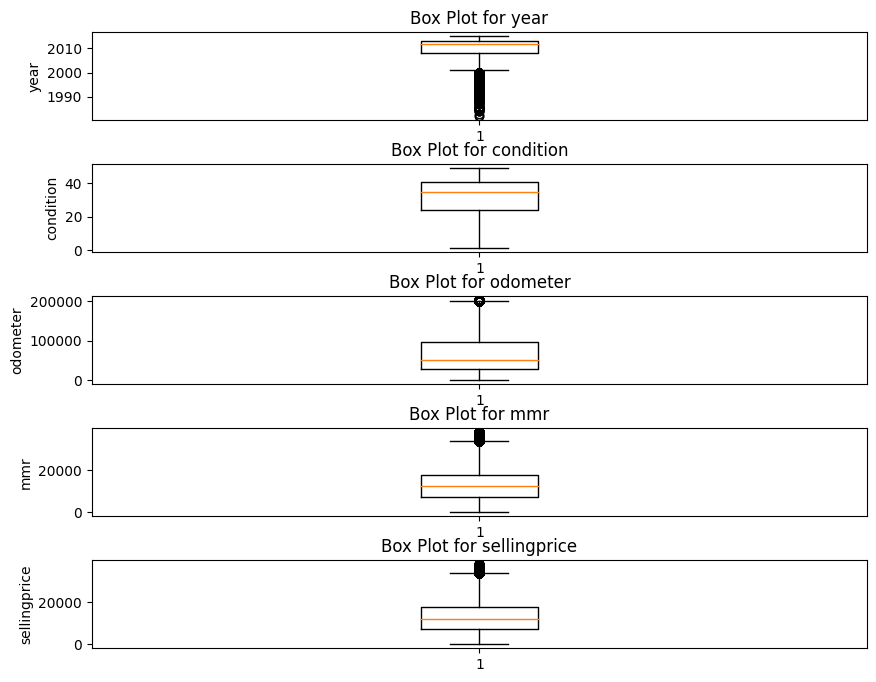

In [61]:

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(clean_df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

In [62]:
df = clean_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534360 entries, 0 to 558836
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          534360 non-null  int64  
 1   make          534360 non-null  object 
 2   body          534360 non-null  object 
 3   state         534360 non-null  object 
 4   condition     534360 non-null  float64
 5   odometer      534360 non-null  float64
 6   color         534360 non-null  object 
 7   seller        534360 non-null  object 
 8   mmr           534360 non-null  float64
 9   sellingprice  534360 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 44.8+ MB


### **K-Means Clustering**

Pada k-means untuk data mobil ini, saya akan mengelompokkan data berdasarkan 3 fitur atau atribut data, yaitu 'condition', 'odometer', dan 'sellingprice'

Maka disini akan dilakukan pemindahan kolom dan ekstraksi kolom

In [63]:
cols = list(df.columns.values)
cols.pop(cols.index('condition'))
df = df[cols+['condition']]

cols = list(df.columns.values)
cols.pop(cols.index('odometer'))
df = df[cols+['odometer']]

cols = list(df.columns.values)
cols.pop(cols.index('sellingprice'))
df = df[cols+['sellingprice']]

df.head()

,year,make,body,state,color,seller,mmr,condition,odometer,sellingprice
0,2015,Kia,SUV,ca,white,kia motors america inc,20500.0,5.0,16639.0,21500.0
1,2015,Kia,SUV,ca,white,kia motors america inc,20800.0,5.0,9393.0,21500.0
2,2014,BMW,Sedan,ca,gray,financial services remarketing (lease),31900.0,45.0,1331.0,30000.0
3,2015,Volvo,Sedan,ca,white,volvo na rep/world omni,27500.0,41.0,14282.0,27750.0
5,2015,Nissan,Sedan,ca,gray,enterprise vehicle exchange / tra / rental / t...,15350.0,1.0,5554.0,10900.0


In [64]:
X = df.iloc[:,7:10].values
X

array([[5.0000e+00, 1.6639e+04, 2.1500e+04],
       [5.0000e+00, 9.3930e+03, 2.1500e+04],
       [4.5000e+01, 1.3310e+03, 3.0000e+04],
       ...,
       [4.8000e+01, 5.0561e+04, 3.4000e+04],
       [3.8000e+01, 1.6658e+04, 1.1100e+04],
       [3.4000e+01, 1.5008e+04, 2.6700e+04]])

In [65]:
from sklearn.preprocessing import StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.9699495 , -1.05418269,  1.07476466],
       [-1.9699495 , -1.20982067,  1.07476466],
       [ 1.07516084, -1.38298566,  2.15077601],
       ...,
       [ 1.30354412, -0.32556665,  2.6571343 ],
       [ 0.54226653, -1.05377458, -0.24176689],
       [ 0.2377555 , -1.0892152 ,  1.73303043]])

**Metode Siku (Elbow Method)**

Metode siku digunakan untuk menemukan jumlah cluster yang optimal dengan mengamati grafik yang menampilkan jumlah dalam-cluster-sum-of-square (WCSS) pada sumbu-y dan jumlah cluster pada sumbu-x.

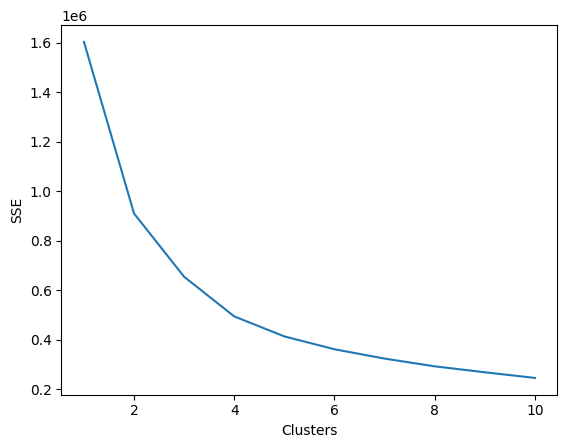

In [66]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(Clus_dataSet)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

Dapat dilihat bahwa cluster yang paling optimal adalah k=4

**K-Means**

In [67]:
k_means = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=20)

labels = k_means.fit_predict(Clus_dataSet)
labels

array([0, 0, 3, ..., 3, 1, 3], dtype=int32)

In [69]:
df['cluster'] = labels

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

Visualisasi hasil dari k-means.

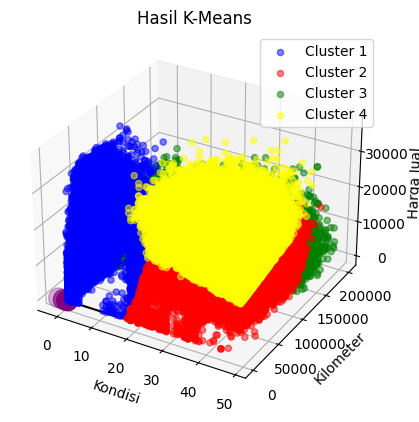

In [70]:
k_means_plot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
k_means_plot.plot3D(xline, yline, zline, 'black')

k_means_plot.scatter3D(df1.condition, df1.odometer, df1.sellingprice,
                       c='blue', label='Cluster 1', alpha=0.5)
k_means_plot.scatter3D(df2.condition, df2.odometer, df2.sellingprice,
                       c='red', label='Cluster 2', alpha=0.5)
k_means_plot.scatter3D(df3.condition, df3.odometer, df3.sellingprice,
                       c='green', label='Cluster 3', alpha=0.5)
k_means_plot.scatter3D(df4.condition, df4.odometer, df4.sellingprice,
                       c='yellow', label='Cluster 4', alpha=0.5)

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
            color = 'purple', s = 200)
plt.legend()
k_means_plot.set_xlabel('Kondisi')
k_means_plot.set_ylabel('Kilometer')
k_means_plot.set_zlabel('Harga Jual')
plt.title("Hasil K-Means")
plt.show()

Dari hasil tersebut, terlihat bahwa jika data dipetakan pada grafik 3D, data secara visual terbagi menjadi empat bagian. Berikut adalah analisis terhadap empat kluster hasil:
1. Kluster 1: Jarak tempuh yang dekat, kondisi kendaraan baik, harga terjangkau.
2. Kluster 2: Jarak tempuh yang dekat, kondisi kendaraan relatif baik, harga lebih tinggi.
3. Kluster 3: Jarak tempuh jauh, kondisi kendaraan bervariasi, harga terjangkau.
4. Kluster 4: Jarak tempuh yang dekat, kondisi kendaraan buruk, harga bervariasi.